<a href="https://colab.research.google.com/github/yihong1011/TibameML/blob/main/07_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 載入cifar10

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
trans =[
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

編號 31986 的答案是: truck


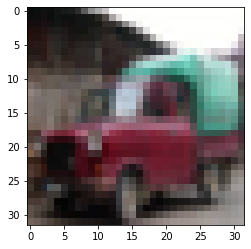

In [6]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0,50000)
print("編號",idx,"的答案是:", trans[y_train[idx][0]])
plt.imshow(x_train[idx])

#### 建置網路

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D
layers_test = [
    Conv2D(64, 3, padding="same", activation="relu", input_shape = (32, 32, 3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="softmax")
]
model_test = Sequential(layers_test)
model_test.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 4, 4, 256)       

In [25]:
layers = [
    Conv2D(64, 3, padding="same", activation="relu", input_shape = (32, 32, 3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 4, 4, 256)       

In [26]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [50]:
# batch_size: 你看多少筆再進行一次梯度下降(5[圖片大/訓練資料少]-200[圖片小/訓練資料多])
# epochs: 全體資料(60000) 你要看幾輪(我們什麼時候要停的關鍵)
# validation_split: 測試什麼時候停下來要用沒看過的資料(val loss穩定的時候就停, 不要過擬合)
# (60000 * 0.9) / 200 -> 270
# verbose: 0(quiet) 1(full) 2(no progress bar)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("/content/drive/MyDrive/AI 資料工程師班01期/DeepLearning/models/cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 5s - loss: 0.3991 - accuracy: 0.8632 - val_loss: 0.6336 - val_accuracy: 0.7898 - 5s/epoch - 20ms/step
Epoch 2/50
225/225 - 4s - loss: 0.3416 - accuracy: 0.8816 - val_loss: 0.6976 - val_accuracy: 0.7816 - 4s/epoch - 19ms/step
Epoch 3/50
225/225 - 4s - loss: 0.2878 - accuracy: 0.8996 - val_loss: 0.6722 - val_accuracy: 0.7898 - 4s/epoch - 19ms/step
Epoch 4/50
225/225 - 4s - loss: 0.2550 - accuracy: 0.9133 - val_loss: 0.6839 - val_accuracy: 0.7912 - 4s/epoch - 19ms/step
Epoch 5/50
225/225 - 4s - loss: 0.2035 - accuracy: 0.9305 - val_loss: 0.7155 - val_accuracy: 0.7900 - 4s/epoch - 19ms/step
Epoch 6/50
225/225 - 4s - loss: 0.1797 - accuracy: 0.9389 - val_loss: 0.7713 - val_accuracy: 0.7874 - 4s/epoch - 19ms/step


In [28]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.6748 - accuracy: 0.7721


[0.6748222708702087, 0.7720999717712402]

In [32]:
pre = model.predict(x_test_norm).argmax(axis=-1)
y_test_reshape = y_test.reshape(-1)

In [33]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_reshape, pre)
pd.DataFrame(mat,
      columns=["{}(預測)".format(trans[i]) for i in range(10)],
      index=["{}(真實)".format(trans[i]) for i in range(10)])

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),852,13,56,7,5,3,8,1,28,27
automobile(真實),21,890,7,4,0,0,7,0,16,55
bird(真實),66,3,714,36,52,36,75,6,2,10
cat(真實),27,6,104,598,42,117,68,19,5,14
deer(真實),36,2,71,43,714,32,60,31,5,6
dog(真實),17,3,51,156,44,650,44,18,8,9
frog(真實),4,5,33,44,11,10,881,4,4,4
horse(真實),25,3,59,40,43,50,11,750,2,17
ship(真實),69,31,22,11,1,3,5,0,834,24
truck(真實),37,73,9,12,0,3,6,7,15,838


3

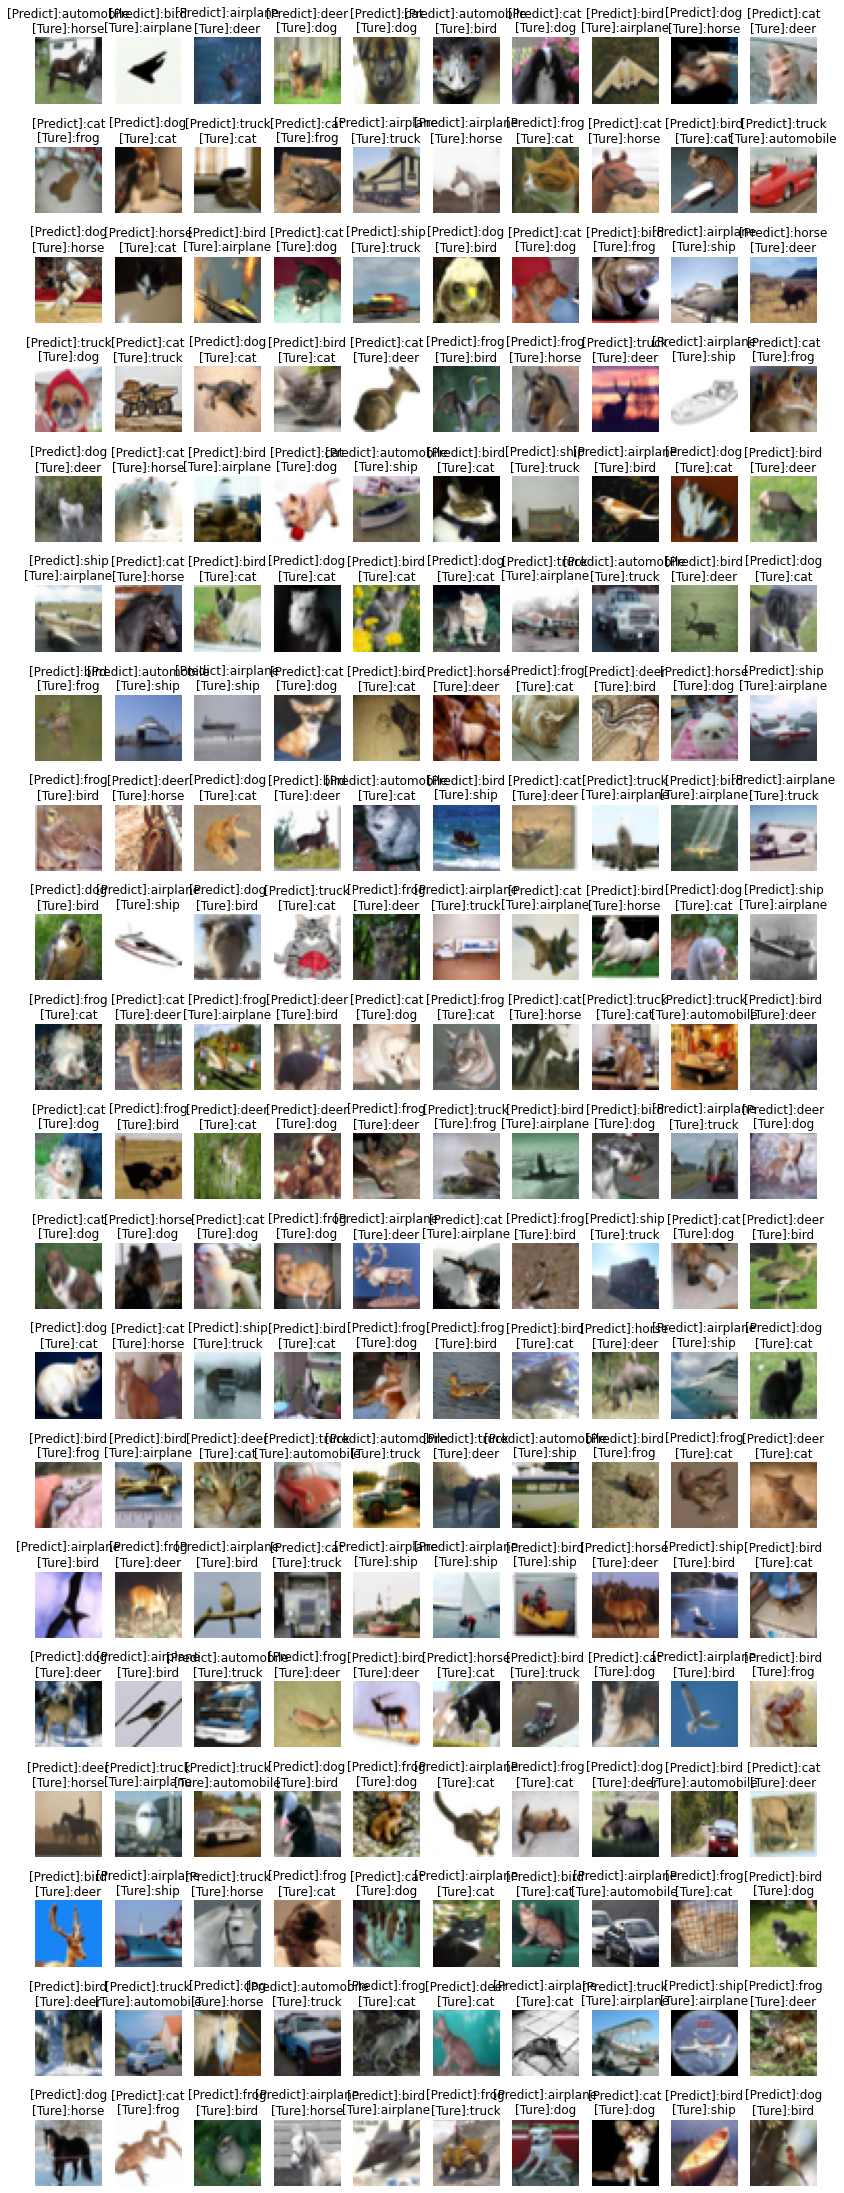

In [37]:
import numpy as np

# 預測不對的idx
idx = np.nonzero(pre != y_test_reshape)[0][:200]
# 預測不對的圖的正確答案
pre_false_label = y_test_reshape[idx]
# 預測不對的圖的預測值
pre_false_pred = pre[idx]
# 預測不對的圖的原圖
pre_false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[Predict]:{}\n[Ture]:{}".format(trans[pre_false_pred[i]], trans[pre_false_label[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

圖片網址https://upload.wikimedia.org/wikipedia/commons/2/23/Red_jungle_fowl.png
airplane 的機率: 0.0019
automobile 的機率: 0.0
bird 的機率: 0.9969
cat 的機率: 0.0002
deer 的機率: 0.0
dog 的機率: 0.0002
frog 的機率: 0.0008
horse 的機率: 0.0
ship 的機率: 0.0
truck 的機率: 0.0


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


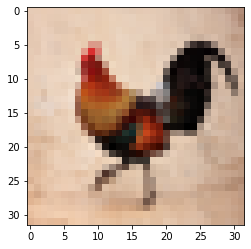

In [55]:
# PIL: pillow
import requests
from PIL import Image
url = input("圖片網址")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((32,32)).convert("RGB")
img_np = np.array(img).reshape(1, 32, 32, 3)/255.0
prob = model.predict(img_np)[0]
for t, p in zip(trans, prob):
  print(t, "的機率:", round(p, 4))
plt.imshow(img)

In [54]:
import os
from tensorflow.keras.models import load_model
model_path = "/content/drive/MyDrive/AI 資料工程師班01期/DeepLearning/models/cnn.h5"
model = load_model(model_path)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 4, 4, 256)       

圖片網址https://upload.wikimedia.org/wikipedia/commons/2/23/Red_jungle_fowl.png
airplane 的機率: 0.0019
automobile 的機率: 0.0
bird 的機率: 0.9969
cat 的機率: 0.0002
deer 的機率: 0.0
dog 的機率: 0.0002
frog 的機率: 0.0008
horse 的機率: 0.0
ship 的機率: 0.0
truck 的機率: 0.0


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


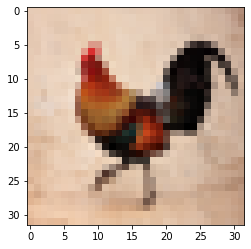

In [53]:
# PIL: pillow
import requests
from PIL import Image
url = input("圖片網址")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((32,32)).convert("RGB")
img_np = np.array(img).reshape(1, 32, 32, 3)/255.0
prob = model.predict(img_np)[0]
for t, p in zip(trans, prob):
  print(t, "的機率:", round(p, 4))
plt.imshow(img)